In [27]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

### Initialize data clusters from sklearn and split train, test data

In [28]:
X, y = make_blobs(n_samples=120, centers=2,
                  random_state=0, cluster_std=0.80)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
y = np.where(y == 0, -1, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [29]:
print('X (Features): \n', X)
print('y (Label): \n', y)

X (Features): 
 [[ 1.49961323  0.77795603]
 [ 2.68432989  0.52452838]
 [ 0.9537243   4.64645282]
 [ 3.78585628  1.96688602]
 [ 1.34880003  3.07479238]
 [-0.04011792  5.07930469]
 [ 2.9349952   1.42187464]
 [ 1.62097834  1.2305037 ]
 [ 1.1372926   0.54740762]
 [ 0.72702805  4.3487196 ]
 [ 1.25509524 -0.33815322]
 [-0.38874607  5.86440764]
 [ 1.07491911  1.57315404]
 [ 0.11966798  5.14734871]
 [ 1.09150494  5.46720613]
 [ 1.02098199  1.11130436]
 [ 3.00569136  1.15121775]
 [ 1.07779975  4.62537882]
 [ 2.81480417  0.96770465]
 [ 1.43933466  1.32906301]
 [ 1.5453179   0.57984621]
 [ 3.25085516 -0.75832436]
 [ 0.56762597  3.35928158]
 [ 0.32575305  2.92276125]
 [-0.3278886   4.67401313]
 [ 1.54659066  1.4388103 ]
 [ 0.86226145  1.24917702]
 [ 0.4688124   4.01359439]
 [ 2.56737274 -0.39590118]
 [ 0.26604148  2.71915015]
 [ 1.77207239 -0.20229737]
 [ 3.86271468  0.86385794]
 [ 0.893695    4.63226613]
 [ 1.73634081  4.18270156]
 [ 0.43830172  4.0161448 ]
 [ 1.91929374  4.15984746]
 [ 0.1374277

### Define Functions 

In [30]:
def linear_SVM(X_train, y_train, X_test, lr, lambda_, epoch_cnt):
    w = np.zeros(np.shape(X_train)[1])
    errors = []
    b = 0

    for epoch in range(1,epoch_cnt):
#         lr = 1/epoch
#         lr = 0.001
        error = 0
        for i, x in enumerate(X_train):
            if y_train[i] * (np.dot(X_train[i], w) - b) < 1:
                w -= lr * (2 * lambda_ * w - y_train[i]*X_train[i])
                b -= lr * y_train[i]
                error = 1
            else:
                w -= lr * (2*lambda_ * w)
        errors.append(error)
    
    Y_pred = np.dot(X_test, w) - b
    Y_pred = np.sign(Y_pred)
    
#     fig = plt.figure(figsize=(10,5))
#     plt.subplot(1,2,1)
#     plt.plot(errors, '|')
#     plt.ylim(0.0,1.5)
#     plt.ylabel('Misclassified')
#     plt.show()
    
    return w, b, Y_pred

In [31]:
def SVM_error(Y_pred, y_test):
    count = 0
    len_array = len(Y_pred)
    for i in range(len_array):
        if Y_pred[i] + y_test[i] != 1:
            count+=1
    return count/len_array

### Plot Hyperplane / boundaries and Train, Test data

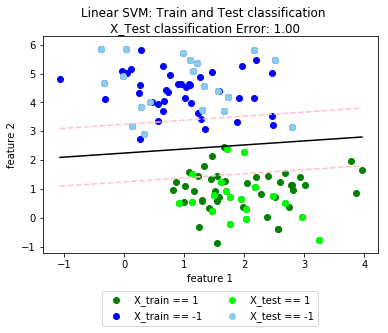

In [33]:
#call SVM function
w, b, Y_pred = linear_SVM(X_train, y_train, X_test , 0.001, 0.01,100000)

#Create single array to slice from
y_ = np.array([y.tolist()])
Xy = np.concatenate((X,y_.T), axis=1)
Y_pred_ = np.array([Y_pred.tolist()])
Xy_pred = np.concatenate((X_test, Y_pred_.T), axis=1)

#Error
Test_error = SVM_error(Y_pred, y_test)

# Hyperplane
x_hyp = np.linspace(np.min(X[:,0]),np.max(X[:,0]))
y_hyp = (-w[0] * x_hyp + b)/w[1]

#Plot 
fig, ax = plt.subplots()
ax.scatter(Xy[np.where(Xy[:,2] == 1)][:,0], Xy[np.where(Xy[:,2] == 1)][:,1], color='green', label = 'X_train == 1')
ax.scatter(Xy[np.where(Xy[:,2] == -1)][:,0], Xy[np.where(Xy[:,2] == -1)][:,1], color='blue', label = 'X_train == -1')

ax.scatter(Xy_pred[np.where(Xy_pred[:,2] == 1)][:,0], Xy_pred[np.where(Xy_pred[:,2] == 1)][:,1], color='lime', label = 'X_test == 1')
ax.scatter(Xy_pred[np.where(Xy_pred[:,2] == -1)][:,0], Xy_pred[np.where(Xy_pred[:,2] == -1)][:,1], color='skyblue', label = 'X_test == -1')

ax.plot(x_hyp, y_hyp, color = 'black')
ax.plot(x_hyp, y_hyp+1, linestyle='--', color = 'pink')
ax.plot(x_hyp, y_hyp-1, linestyle='--', color = 'pink')

#Define labels, legend 
fig.suptitle('Linear SVM: Train and Test classification \nX_Test classification Error: %0.2f' %(Test_error), fontsize=12)
plt.xlabel('feature 1', fontsize=10)
plt.ylabel('feature 2', fontsize=10)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, fancybox=True, shadow=False)

plt.show()